You can download the `requirements.txt` for this course from the workspace of this lab. `File --> Open...`

# L2-A - Linear Quantization I: Quantize and De-quantize a Tensor

In this lesson, you will learn the fundamentals of linear quantization.

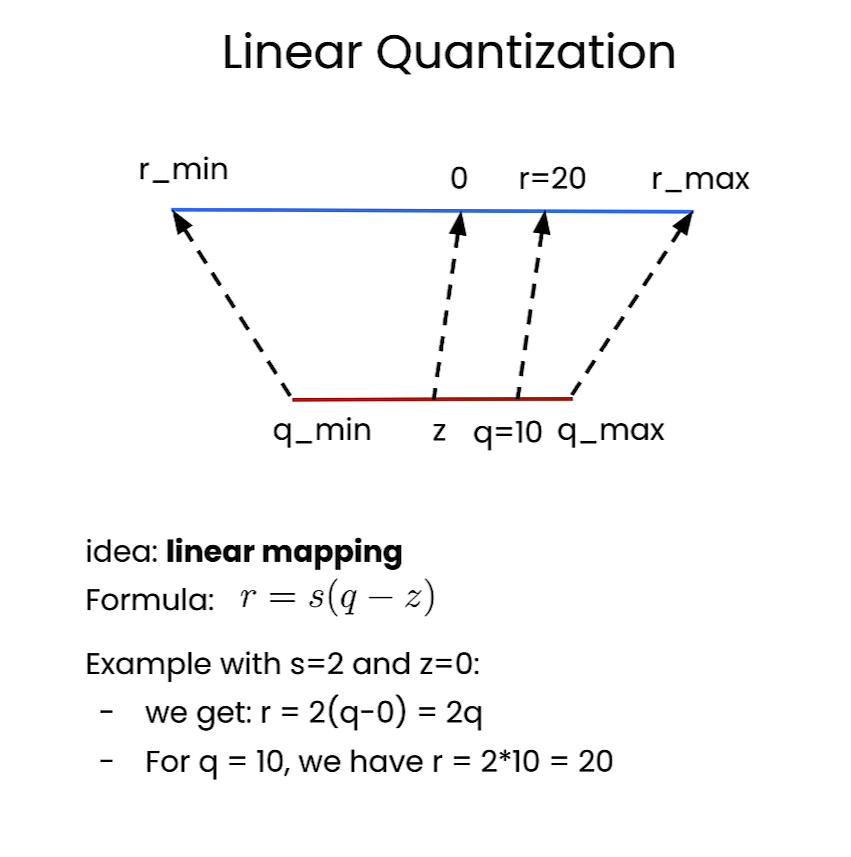

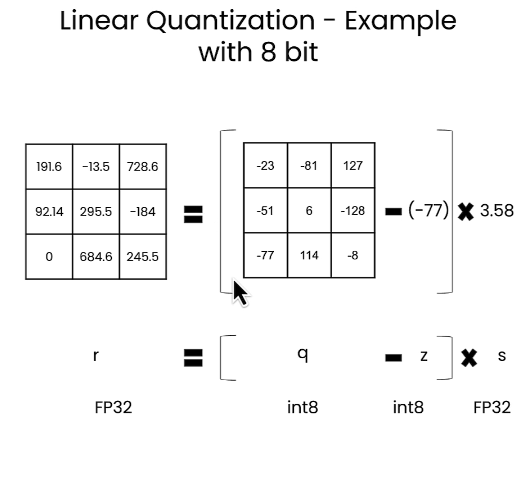

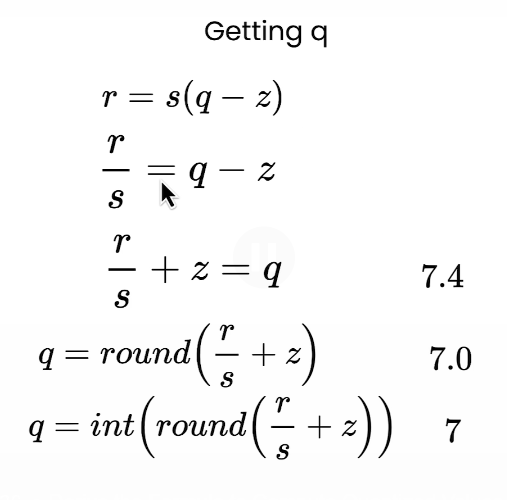
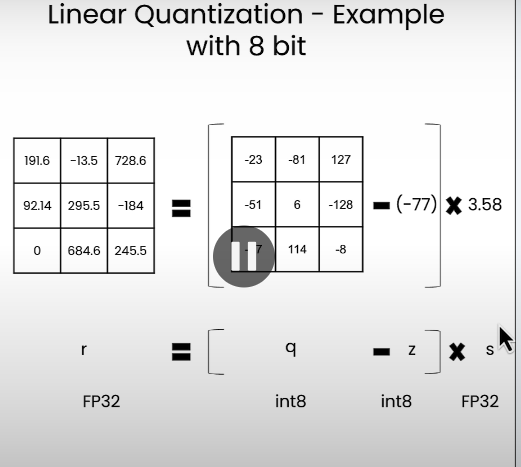

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

In [1]:
import torch

## Quantization with Random `Scale` and `Zero Point`

- Implement Linear Quantization for when the "scale" and the "zero point" are known/randomly selected.

In [2]:
def linear_q_with_scale_and_zero_point(
    tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)
    
    return q_tensor

In [3]:
### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [4]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 3.5
zero_point = -70

In [5]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale, zero_point)

In [6]:
quantized_tensor

tensor([[ -15,  -74,  127],
        [ -44,   14, -123],
        [ -70,  126,    0]], dtype=torch.int8)

## Dequantization with Random `Scale` and `Zero Point`

- Now, Dequantize the tensor to see how precise the quantization is.

In [7]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [8]:
# this was the original tensor
# [[191.6, -13.5, 728.6],
#  [92.14, 295.5,  -184],
#  [0,     684.6, 245.5]]

In [9]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

In [10]:
### without casting to float
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000, -206.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000, -210.0000,  245.0000]])

In [11]:
def linear_dequantization(quantized_tensor, scale, zero_point):
    return scale * (quantized_tensor.float() - zero_point)

- Calculate `dequantized_tensor` using the function `linear_dequantization`.

In [12]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point)

- Print the results of the `dequantized_tensor`.

In [13]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

### Quantization Error

- Load the `plot_quantization_errors` from the helper file.
- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

In [14]:
from helper import plot_quantization_errors

- Plot the quantization results.

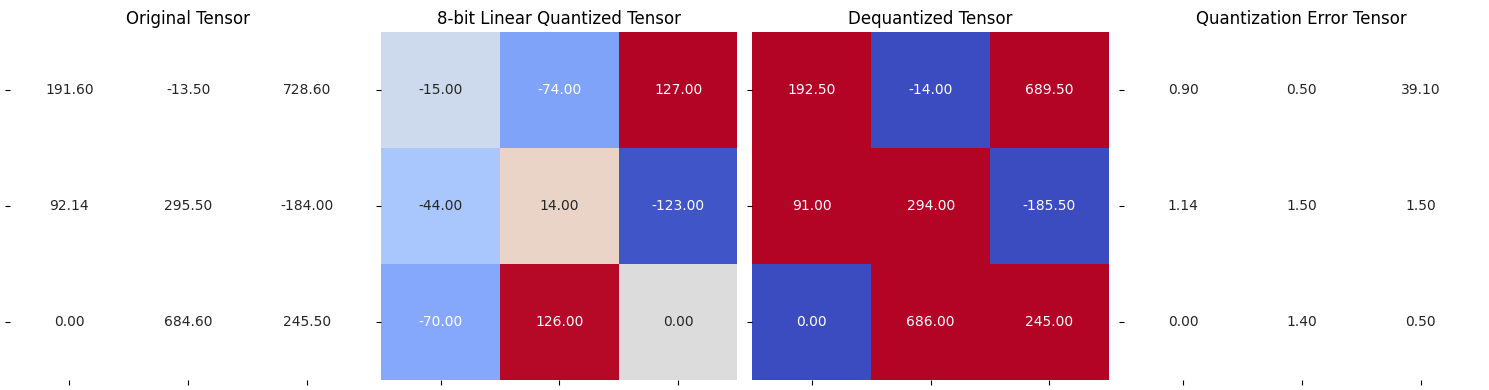

In [15]:
plot_quantization_errors(test_tensor, quantized_tensor,
                         dequantized_tensor)

**Note:** For the plot above, `Quantization Error Tensor = abs(Original Tensor - Dequantized Tensor)`

- Calculate an "overall" quantization error by using [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) technique.

In [16]:
dequantized_tensor - test_tensor

tensor([[  0.9000,  -0.5000, -39.1000],
        [ -1.1400,  -1.5000,  -1.5000],
        [  0.0000,   1.4000,  -0.5000]])

In [17]:
(dequantized_tensor - test_tensor).square()

tensor([[8.0999e-01, 2.5000e-01, 1.5288e+03],
        [1.2996e+00, 2.2500e+00, 2.2500e+00],
        [0.0000e+00, 1.9601e+00, 2.5000e-01]])

In [18]:
(dequantized_tensor - test_tensor).square().mean()

tensor(170.8753)

In [20]:
# Create a Jupyter Notebook for Linear Quantization (Theory + Examples)

import nbformat as nbf
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell
import json

nb = new_notebook()

cells = []

# -------------------- MARKDOWN CELLS --------------------

cells.append(new_markdown_cell(
"# Linear Quantization - Theory and Examples\n"
"Author: Generated by ChatGPT\n\n"
"This notebook explains the complete theory of Linear Quantization "
"with mathematical derivations and practical Python examples."
))

cells.append(new_markdown_cell(
"## 1. What is Quantization?\n"
"Quantization is the process of mapping high precision floating point values "
"(e.g., float32) into lower precision discrete values (e.g., int8).\n\n"
"In Deep Learning, quantization is used to:\n"
"- Reduce model size\n"
"- Reduce memory usage\n"
"- Speed up inference\n"
"- Enable edge deployment"
))

cells.append(new_markdown_cell(
"## 2. Linear Quantization Theory\n"
"Linear quantization assumes a linear mapping between float values and integer values.\n\n"
"### Core Equations\n\n"
"Forward mapping:\n"
"q = round(x / S + Z)\n\n"
"Dequantization:\n"
"x_hat = S (q - Z)\n\n"
"Where:\n"
"- S = scale\n"
"- Z = zero-point\n"
"- q = quantized integer\n"
"- x = original float value"
))

cells.append(new_markdown_cell(
"## 3. Computing Scale and Zero-Point\n\n"
"For an integer range [q_min, q_max] and float range [x_min, x_max]:\n\n"
"Scale:\n"
"S = (x_max - x_min) / (q_max - q_min)\n\n"
"Zero-point:\n"
"Z = round(q_min - x_min / S)"
))

cells.append(new_markdown_cell(
"## 4. Numerical Example (8-bit Quantization)\n"
"We quantize values in range [-1.0, 1.0] to int8 [-128, 127]."
))

# -------------------- CODE EXAMPLE --------------------

cells.append(new_code_cell(
"import numpy as np\n\n"
"# Define float range\n"
"x_min = -1.0\n"
"x_max = 1.0\n\n"
"# Define int8 range\n"
"q_min = -128\n"
"q_max = 127\n\n"
"# Compute scale\n"
"S = (x_max - x_min) / (q_max - q_min)\n\n"
"# Compute zero point\n"
"Z = round(q_min - x_min / S)\n\n"
"S, Z"
))

cells.append(new_markdown_cell(
"### Quantize Sample Values"
))

cells.append(new_code_cell(
"# Sample float values\n"
"x = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])\n\n"
"# Quantization\n"
"q = np.round(x / S + Z)\n\n"
"# Dequantization\n"
"x_hat = S * (q - Z)\n\n"
"print('Original:', x)\n"
"print('Quantized:', q)\n"
"print('Dequantized:', x_hat)"
))

cells.append(new_markdown_cell(
"## 5. Quantization Error\n\n"
"Quantization error:\n"
"error = x - x_hat\n\n"
"Maximum theoretical error is S/2."
))

cells.append(new_code_cell(
"error = x - x_hat\n"
"print('Error:', error)\n"
"print('Max theoretical error:', S/2)"
))

cells.append(new_markdown_cell(
"## 6. Visualization of Linear Quantization\n"
"This plot shows how float values map to quantized levels."
))

cells.append(new_code_cell(
"import matplotlib.pyplot as plt\n\n"
"# Generate continuous float values\n"
"x_cont = np.linspace(-1, 1, 100)\n"
"q_cont = np.round(x_cont / S + Z)\n"
"x_deq = S * (q_cont - Z)\n\n"
"plt.figure()\n"
"plt.plot(x_cont, x_deq)\n"
"plt.xlabel('Original Float Value')\n"
"plt.ylabel('Dequantized Value')\n"
"plt.title('Linear Quantization Mapping')\n"
"plt.show()"
))

cells.append(new_markdown_cell(
"## 7. Symmetric vs Asymmetric Quantization\n\n"
"### Symmetric:\n"
"- Zero-point = 0\n"
"- Range symmetric around zero\n"
"- Mostly used for weights\n\n"
"### Asymmetric:\n"
"- Zero-point ≠ 0\n"
"- Better range utilization\n"
"- Mostly used for activations"
))

cells.append(new_markdown_cell(
"## 8. Per-Tensor vs Per-Channel Quantization\n\n"
"Per-Tensor: Single scale for entire tensor.\n\n"
"Per-Channel: Separate scale per output channel.\n\n"
"Per-channel improves accuracy especially in CNNs and Transformers."
))

cells.append(new_markdown_cell(
"## 9. Summary\n\n"
"Linear Quantization:\n"
"- Uses uniform step size\n"
"- Simple and hardware friendly\n"
"- Introduces bounded error\n"
"- Forms the basis of modern model compression techniques"
))

nb["cells"] = cells

file_path = "Linear_Quantization_Theory_and_Examples.ipynb"

with open(file_path, "w", encoding="utf-8") as f:
    nbf.write(nb, f)

file_path


'Linear_Quantization_Theory_and_Examples.ipynb'